In [6]:
# Code used for Analysis
import pandas as pd
import matplotlib.pyplot as plt
%store -r cg

In [9]:
cg = cg # Defining cg 

In [10]:
cg.head()

,game_order,event,site,white_title,white_rating_diff,white_elo,white,result,black,black_elo,black_rating_diff,black_title,winner_loser_elo_diff,eco,termination,time_control,utc_date,utc_time,variant,magnus_result
0,105,Lichess Titled Arena,https://lichess.org/KEvLWfdH,GM,58.0,2500,Magnus Carlsen,1-0,jsalomon,2532,-13.0,GM,-32,E47,Normal,60+0,2017.12.14,21:00:02,Standard,lost
1,104,Lichess Titled Arena,https://lichess.org/9YoOXtxp,IM,17.0,2420,Yoseph Taher,1-0,Magnus Carlsen,2558,-65.0,GM,-138,B01,Time forfeit,60+0,2017.12.14,21:01:10,Standard,lost
2,103,Lichess Titled Arena,https://lichess.org/yh0IxjPf,FM,-17.0,2754,gnejs,0-1,Magnus Carlsen,2493,73.0,GM,-261,B01,Normal,60+0,2017.12.14,21:04:13,Standard,lost
3,102,Lichess Titled Arena,https://lichess.org/qcHWzltq,GM,61.0,2566,Magnus Carlsen,1-0,Toivo Keinänen,2755,-16.0,IM,-189,A01,Normal,60+0,2017.12.14,21:06:30,Standard,lost
4,101,Lichess Titled Arena,https://lichess.org/HhV5RN5e,GM,9.0,2627,Magnus Carlsen,1-0,AusCub,2275,-4.0,NM,352,A01,Normal,60+0,2017.12.14,21:07:57,Standard,lost


In [70]:
# The next few code blocks is an attempt to keep track of Magnus' elo. This also helps when keeping track of his oppponent's elo as well
magnuswhiteelo = cg.loc[(cg.white=='Magnus Carlsen'),['white_elo']]
magnuswhiteelo.reset_index(inplace=True)
magnuswhiteelo

,index,white_elo
0,0,2500
1,3,2566
2,4,2627
3,6,2675
4,9,2652
...,...,...
6737,13433,3191
6738,13435,3196
6739,13437,3202
6740,13439,3207


In [71]:
magnusblackelo = cg.loc[(cg.black=='Magnus Carlsen'),['black_elo']]
magnusblackelo.reset_index(inplace=True)
magnusblackelo

,index,black_elo
0,1,2558
1,2,2493
2,5,2636
3,7,2695
4,8,2702
...,...,...
6695,13432,3188
6696,13434,3193
6697,13436,3199
6698,13438,3204


In [93]:
def mergeelo(row):
    return row.white_elo + row.black_elo

In [90]:
magnuselo = magnuswhiteelo.merge(magnusblackelo,how='outer',on='index',sort=True)
magnuselo = magnuselo.fillna(0)
magnuselo

,index,white_elo,black_elo
0,0,2500.0,0.0
1,1,0.0,2558.0
2,2,0.0,2493.0
3,3,2566.0,0.0
4,4,2627.0,0.0
...,...,...,...
13437,13437,3202.0,0.0
13438,13438,0.0,3204.0
13439,13439,3207.0,0.0
13440,13440,0.0,3209.0


In [95]:
magnuselo['elo']= magnuselo.apply(lambda row: mergeelo(row),axis=1)
magnuselo

,index,white_elo,black_elo,elo
0,0,2500.0,0.0,2500.0
1,1,0.0,2558.0,2558.0
2,2,0.0,2493.0,2493.0
3,3,2566.0,0.0,2566.0
4,4,2627.0,0.0,2627.0
...,...,...,...,...
13437,13437,3202.0,0.0,3202.0
13438,13438,0.0,3204.0,3204.0
13439,13439,3207.0,0.0,3207.0
13440,13440,0.0,3209.0,3209.0


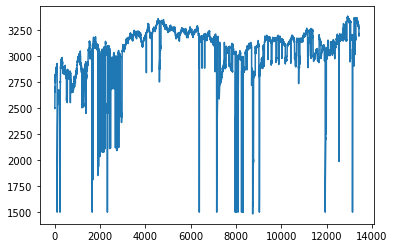

In [96]:
plt.plot(magnuselo.index,magnuselo.elo)
# new accounts start at 1500

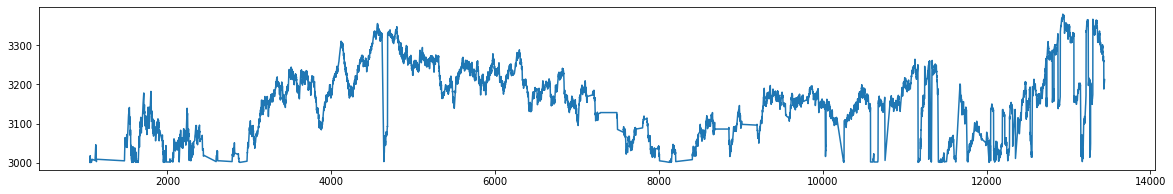

In [110]:
plt.plot(magnuselo.index[magnuselo.elo>3000],magnuselo.elo[magnuselo.elo>3000])
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [ ]:
cg.magnus_result.value_counts()

In [24]:
# Converts a number of wins, losses, and ties to a win percentage
def winpercentage(arr):
    return (arr[0] + arr[2]*0.5)/sum(arr)

In [27]:
print('Overall win percentage: ',winpercentage(cg.magnus_result.value_counts()))
print('Black win percentage: ',winpercentage(cg[cg.black=='Magnus Carlsen'].magnus_result.value_counts()))
print('White win percentage: ',winpercentage(cg[cg.white=='Magnus Carlsen'].magnus_result.value_counts()))
# Significant 5% difference between black and white

Overall win percentage:  0.7188662401428358
Black win percentage:  0.6903731343283582
White win percentage:  0.7471818451498072


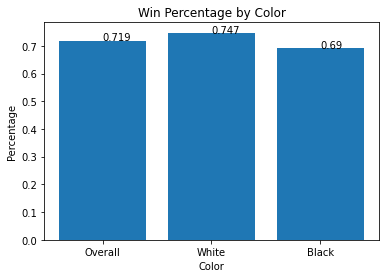

In [56]:
x = ['Overall','White','Black']
y = [winpercentage(cg.magnus_result.value_counts()),winpercentage(cg[cg.white=='Magnus Carlsen'].magnus_result.value_counts()),winpercentage(cg[cg.black=='Magnus Carlsen'].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Win Percentage by Color')
plt.xlabel('Color')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

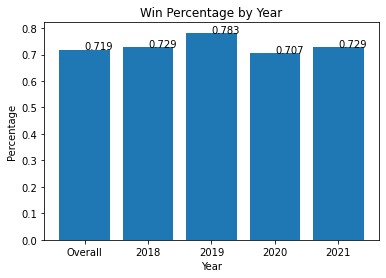

In [54]:
x = ['Overall','2018','2019','2020','2021']
y = [winpercentage(cg.magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2018'].magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2019'].magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2020'].magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2021'].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Win Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

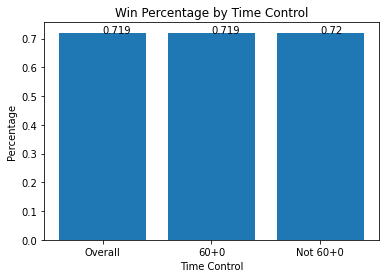

In [57]:
# 85% of games are 60+0, 6% of games are 180+0 and other time controls are even lower, will change or remove
x = ['Overall','60+0','Not 60+0']
y = [winpercentage(cg.magnus_result.value_counts()),winpercentage(cg[cg.time_control=='60+0'].magnus_result.value_counts()),winpercentage(cg[cg.time_control!='60+0'].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Win Percentage by Time Control')
plt.xlabel('Time Control')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

In [ ]:
for index, value in enumerate():
    plt.text(index, value,
             str(round(value,3)))
plt.show()

In [49]:
for i,v in enumerate([0,2,4,6]):
    print(i,v)

0 0
1 2
2 4
3 6


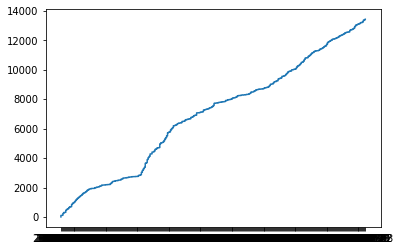

In [12]:
plt.plot(cg.utc_date,cg.index)